<a href="https://colab.research.google.com/github/trinade96/Fortiate_Project/blob/master/Classification_Methods(NN%2CKmeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### In this notebook we will be working with the same data as we did for 'Smart_Rules_Decision_Trees' but we will be working with it slightly differently so we can retain a lot of the data and hopefully find out reliable measures of performance from it. We will try the Nearest Neighbour classifier, the KMeans classifier and also a way to map higher dimensional data after being plotted by clustering algorithms.

### **Nearest_Neighbours_Classification**
https://scikit-learn.org/stable/modules/neighbors.html <br>
Look at the above link for more clarity on Nearest Neighbour Classification and how it works, also details of arguments and methods of sklearn nearest neighbour classification

##### **Packages Used**

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, silhouette_score, pairwise_distances, calinski_harabasz_score
import matplotlib.pyplot as plt
import graphviz
import pprint
from pandas.api.types import is_float_dtype

##### **Reading the data**

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
data = pd.read_excel('/gdrive/My Drive/Random-Forest-Rules-Final-Rearranged-mindmap.xlsx')
data.head()

,TRANSACTION_CURRENCY,PD4,PD11,PROC_CODE_12,PD8,MCC,POS_ENTRY_MODE,SERVICE_CODE,BILLING_AMOUNT,TRANSACTION_LOCAL_DATE,TRANSMISSION_DATE_TIME,RESPONSE_DATE_TIME,PAN,VALID_FROM,EXPIRY_DATE,PROC_CODE_34,PROC_CODE_56,PD1,PD2,PD3,PD5,PD6,PD7,PD9,PD10,PD12,TRANSACTION_AMOUNT,BILLING_CURRENCY,CONVERSION_RATE_DATE,SETTLEMENT_AMOUNT,SETTLEMENT_CURRENCY,SETTLEMENT_DATE,ACQUIRING_COUNTRY_CODE,CARD_ACCEPTOR_TERM_ID,CARD_ACCEPTOR_ID,CARD_ACC_NAME_ADDRESS,AUTHORIZATION_CODE,DECISION,TARGET,C_100,C_40,C_20,ECOM_INFO,E_COM_INDICATOR
0,CURR356,ATC9,TOC1,TC00,TVI0,MCC7399,NNN,UNK,147.84,21-MAR-18 11.33.24,21-MAR-18 11.33.24,21-MAR-18 11.33.24,A1586941252148110,21-AUG-17 17.10.11,01-APR-20 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,147.84,CURR356,000,145.22,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9826826968,BOOK MY SHOW\\\400049\\,800204,RESULT000,0,AMI,ACS,T0784,AXASK05AEVV,ECI05
1,CURR356,ATC9,TOC1,TC00,TVI0,MCC4814,NNN,UNK,399.00,21-MAR-18 11.34.15,21-MAR-18 11.34.15,21-MAR-18 11.34.15,A1586941241334010,06-APR-16 20.19.15,01-APR-20 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,399.00,CURR356,000,391.94,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9822047692,PAYTM RETAIL -PG-ONLINE \\NOIDA\201301\,300255,RESULT000,0,AMI,ACS,T0797,AXASK05AEVV,ECI05
2,CURR356,ATC9,TOC1,TC00,TVI0,MCC7399,NNN,UNK,247.20,21-MAR-18 11.36.47,21-MAR-18 11.36.47,21-MAR-18 11.36.48,A1586941049519010,03-APR-18 14.19.03,01-APR-23 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,247.20,CURR356,000,242.82,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9826826968,BOOK MY SHOW\\\400049\\,700408,RESULT000,0,AMI,ACS,T0537,AXASK05AEVV,ECI05
3,CURR356,ATC9,TOC1,TC00,TVI0,MCC7399,NNN,UNK,359.00,21-MAR-18 11.39.44,21-MAR-18 11.39.44,21-MAR-18 11.39.44,A1586941050671000,20-APR-18 19.43.48,01-APR-23 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,359.00,CURR356,000,352.65,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9826826968,BOOK MY SHOW\\\400049\\,700585,RESULT000,0,AMI,ACS,T0796,AXASK05AEVV,ECI05
4,CURR356,ATC9,TOC1,TC00,TVI0,MCC5999,NNN,UNK,188.00,21-MAR-18 11.43.08,21-MAR-18 11.43.08,21-MAR-18 11.43.08,A1586941257961010,30-APR-16 20.49.02,01-APR-20 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,188.00,CURR356,000,183.81,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9820524155,PAYTM.COM WALLET PG \\NOIDA\201310\\,400788,RESULT000,0,AMI,ACS,T0784,AXASK05AEVV,ECI05


In [4]:
data.shape

(105271, 44)

##### We will be treating the data a little differently here, not removing the NaNs but keeping them as a different category so it can be passed to the classifier so we don't loose too data

In [5]:
for col in data.keys():
  data[col] = data[col].fillna(str(col))
  print(data[col].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [6]:
data.dropna(axis=0)
data.shape

(105271, 44)

##### Now we will move onto to removing the index like columns and then encoding the dataset to be passed on to the classifier.

##### **Function to remove columns which are a list on distinct values for eg. the index**

In [7]:
def remove_index_like(df):
  df_new = df.copy()
  indices = []
  for i in df_new.columns:
    if len(df[i]) == len(set(df[i])):
      indices.append(i)
  df_new = df_new.drop(indices,1)
  return df_new

In [8]:
data_dt = remove_index_like(data)

In [9]:
data_dt.shape

(105271, 44)

In [10]:
data_dt.head()

,TRANSACTION_CURRENCY,PD4,PD11,PROC_CODE_12,PD8,MCC,POS_ENTRY_MODE,SERVICE_CODE,BILLING_AMOUNT,TRANSACTION_LOCAL_DATE,TRANSMISSION_DATE_TIME,RESPONSE_DATE_TIME,PAN,VALID_FROM,EXPIRY_DATE,PROC_CODE_34,PROC_CODE_56,PD1,PD2,PD3,PD5,PD6,PD7,PD9,PD10,PD12,TRANSACTION_AMOUNT,BILLING_CURRENCY,CONVERSION_RATE_DATE,SETTLEMENT_AMOUNT,SETTLEMENT_CURRENCY,SETTLEMENT_DATE,ACQUIRING_COUNTRY_CODE,CARD_ACCEPTOR_TERM_ID,CARD_ACCEPTOR_ID,CARD_ACC_NAME_ADDRESS,AUTHORIZATION_CODE,DECISION,TARGET,C_100,C_40,C_20,ECOM_INFO,E_COM_INDICATOR
0,CURR356,ATC9,TOC1,TC00,TVI0,MCC7399,NNN,UNK,147.84,21-MAR-18 11.33.24,21-MAR-18 11.33.24,21-MAR-18 11.33.24,A1586941252148110,21-AUG-17 17.10.11,01-APR-20 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,147.84,CURR356,000,145.22,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9826826968,BOOK MY SHOW\\\400049\\,800204,RESULT000,0,AMI,ACS,T0784,AXASK05AEVV,ECI05
1,CURR356,ATC9,TOC1,TC00,TVI0,MCC4814,NNN,UNK,399.00,21-MAR-18 11.34.15,21-MAR-18 11.34.15,21-MAR-18 11.34.15,A1586941241334010,06-APR-16 20.19.15,01-APR-20 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,399.00,CURR356,000,391.94,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9822047692,PAYTM RETAIL -PG-ONLINE \\NOIDA\201301\,300255,RESULT000,0,AMI,ACS,T0797,AXASK05AEVV,ECI05
2,CURR356,ATC9,TOC1,TC00,TVI0,MCC7399,NNN,UNK,247.20,21-MAR-18 11.36.47,21-MAR-18 11.36.47,21-MAR-18 11.36.48,A1586941049519010,03-APR-18 14.19.03,01-APR-23 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,247.20,CURR356,000,242.82,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9826826968,BOOK MY SHOW\\\400049\\,700408,RESULT000,0,AMI,ACS,T0537,AXASK05AEVV,ECI05
3,CURR356,ATC9,TOC1,TC00,TVI0,MCC7399,NNN,UNK,359.00,21-MAR-18 11.39.44,21-MAR-18 11.39.44,21-MAR-18 11.39.44,A1586941050671000,20-APR-18 19.43.48,01-APR-23 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,359.00,CURR356,000,352.65,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9826826968,BOOK MY SHOW\\\400049\\,700585,RESULT000,0,AMI,ACS,T0796,AXASK05AEVV,ECI05
4,CURR356,ATC9,TOC1,TC00,TVI0,MCC5999,NNN,UNK,188.00,21-MAR-18 11.43.08,21-MAR-18 11.43.08,21-MAR-18 11.43.08,A1586941257961010,30-APR-16 20.49.02,01-APR-20 00.00.00,FR40,TO00,CRC1,CVC0,CCC0,PPI4,CPI0,TCR2,TCV0,TWC0,PEI0,188.00,CURR356,000,183.81,CURR356,22-MAR-18 00.00.00,CON356,6R00G052,9820524155,PAYTM.COM WALLET PG \\NOIDA\201310\\,400788,RESULT000,0,AMI,ACS,T0784,AXASK05AEVV,ECI05


##### So there are no index like columns here, so we can simply convert all of them via LabelEncoder to numeric encodings to be passed on to the decision tree, however we will first find out the float type columns and have them be as it is.


##### **Function to find float type columns in the dataframe**

In [11]:
#Function to find if a column is categorical or not and assign numerical encoding to it
def check_float(df):
  ## Keeping float data type columns as it is 
  float_cols = []
  new_df = pd.DataFrame()
  for col in df.columns:
    if(is_float_dtype(df[col])== True):
      new_df[col] = df[col]
      float_cols.append(col)
  return new_df, float_cols

In [12]:
float_df, float_cols = check_float(data_dt)
float_cols

['BILLING_AMOUNT', 'TRANSACTION_AMOUNT', 'SETTLEMENT_AMOUNT']

In [13]:
float_df.head()

,BILLING_AMOUNT,TRANSACTION_AMOUNT,SETTLEMENT_AMOUNT
0,147.84,147.84,145.22
1,399.00,399.00,391.94
2,247.20,247.20,242.82
3,359.00,359.00,352.65
4,188.00,188.00,183.81


In [14]:
data_dt2 = data_dt.drop(float_cols,1)
data_dt2.shape

(105271, 41)

In [15]:
data_dt_final = data_dt2.apply(preprocessing.LabelEncoder().fit_transform)
data_dt_final.head()

,TRANSACTION_CURRENCY,PD4,PD11,PROC_CODE_12,PD8,MCC,POS_ENTRY_MODE,SERVICE_CODE,TRANSACTION_LOCAL_DATE,TRANSMISSION_DATE_TIME,RESPONSE_DATE_TIME,PAN,VALID_FROM,EXPIRY_DATE,PROC_CODE_34,PROC_CODE_56,PD1,PD2,PD3,PD5,PD6,PD7,PD9,PD10,PD12,BILLING_CURRENCY,CONVERSION_RATE_DATE,SETTLEMENT_CURRENCY,SETTLEMENT_DATE,ACQUIRING_COUNTRY_CODE,CARD_ACCEPTOR_TERM_ID,CARD_ACCEPTOR_ID,CARD_ACC_NAME_ADDRESS,AUTHORIZATION_CODE,DECISION,TARGET,C_100,C_40,C_20,ECOM_INFO,E_COM_INDICATOR
0,14,5,1,0,0,258,14,6,9,0,0,934,28389,1,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27991,5564,70860,0,0,0,0,594,21702,3
1,14,5,1,0,0,100,14,6,10,1,1,875,7515,1,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27698,28286,16588,0,0,0,0,602,21702,3
2,14,5,1,0,0,258,14,6,11,2,2,492,2951,4,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27991,5564,59898,0,0,0,0,419,21702,3
3,14,5,1,0,0,258,14,6,12,3,3,529,26953,4,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27991,5564,59907,0,0,0,0,601,21702,3
4,14,5,1,0,0,217,14,6,15,6,5,961,43447,1,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27548,28293,27344,0,0,0,0,594,21702,3


In [16]:
#Reinstating the float columns as they are back into the data frame
for f in float_cols:
  data_dt_final[f] = data_dt[f]

data_dt_final.shape


(105271, 44)

In [17]:
data_dt_final.head()

,TRANSACTION_CURRENCY,PD4,PD11,PROC_CODE_12,PD8,MCC,POS_ENTRY_MODE,SERVICE_CODE,TRANSACTION_LOCAL_DATE,TRANSMISSION_DATE_TIME,RESPONSE_DATE_TIME,PAN,VALID_FROM,EXPIRY_DATE,PROC_CODE_34,PROC_CODE_56,PD1,PD2,PD3,PD5,PD6,PD7,PD9,PD10,PD12,BILLING_CURRENCY,CONVERSION_RATE_DATE,SETTLEMENT_CURRENCY,SETTLEMENT_DATE,ACQUIRING_COUNTRY_CODE,CARD_ACCEPTOR_TERM_ID,CARD_ACCEPTOR_ID,CARD_ACC_NAME_ADDRESS,AUTHORIZATION_CODE,DECISION,TARGET,C_100,C_40,C_20,ECOM_INFO,E_COM_INDICATOR,BILLING_AMOUNT,TRANSACTION_AMOUNT,SETTLEMENT_AMOUNT
0,14,5,1,0,0,258,14,6,9,0,0,934,28389,1,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27991,5564,70860,0,0,0,0,594,21702,3,147.84,147.84,145.22
1,14,5,1,0,0,100,14,6,10,1,1,875,7515,1,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27698,28286,16588,0,0,0,0,602,21702,3,399.00,399.00,391.94
2,14,5,1,0,0,258,14,6,11,2,2,492,2951,4,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27991,5564,59898,0,0,0,0,419,21702,3,247.20,247.20,242.82
3,14,5,1,0,0,258,14,6,12,3,3,529,26953,4,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27991,5564,59907,0,0,0,0,601,21702,3,359.00,359.00,352.65
4,14,5,1,0,0,217,14,6,15,6,5,961,43447,1,4,0,1,0,0,4,0,1,0,0,0,1,0,1,1,29,40758,27548,28293,27344,0,0,0,0,594,21702,3,188.00,188.00,183.81


In [18]:
X = np.array(data_dt_final)
#y = np.array(data_dt_final.loc[:,'TARGET'])
print(X.shape)
#print(y.shape)

(105271, 44)


In [19]:
# Split into training and test set 
#X_train, X_test, y_train, y_test = train_test_split( 
#             X, y, test_size = 0.1, random_state=42) 
X_train, X_test = train_test_split(X, test_size = 0.1, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(94743, 44)
(10528, 44)


In [20]:
neigh = NearestNeighbors(n_neighbors=100)
neigh.fit(X_train) 

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                 radius=1.0)

In [21]:
#Finding the nearest neighbours for the data in X_test, with the distances
#Takes some time please be patient
nbrs = neigh.kneighbors(X_test, return_distance=True)

In [22]:
nbrs = np.array(nbrs)
print(nbrs.shape)
print(nbrs[0].shape)
print(nbrs[1].shape)

(2, 10528, 100)
(10528, 100)
(10528, 100)


##### What this means is that nbrs is a 3D numpy array, nbrs[0] has all distance values in it, and nbrs[1] has indices in it, So what we have is the distances and indices of the 100 nearest neighbours of each point in X_test. The same number of neighbours given to the classifier is used. A different number of neighbours while finding nearest neighbours can also be used. Now we can used these 100 nearest neighbours to find the characteristics of the cluster, or we can define an argument called radius passed to neigh.kneighbors() and find what all neighbours in the given radius of the point act like. 

In [23]:
#Takes sometime please be patient
nbrs2 = neigh.kneighbors(X_test, 2,return_distance=True)
nbrs2 = np.array(nbrs2)
print(nbrs2.shape)

(2, 10528, 2)


##### This on the other hand gives the distances to and indices of the 2 nearest neighbours of each of the data points in X_test

In [24]:
#This takes a bit of time if you choose to run on all of X_test, please be patient
X_test_0 = X_test[0].reshape(1,-1)
nbrs3 = neigh.radius_neighbors(X_test_0, radius = 100000,return_distance=True) 
#This has a sort_results argument above which can be used to sort the neighbours by distance
nbrs3 = np.array(nbrs3)
print(nbrs3.shape)

(2, 1)


In [25]:
len(nbrs3[0][0])

72618

In [26]:
np.asarray(nbrs3[0][0])

array([88020.59262228, 88015.15150573, 86219.80706646, ...,
       95636.95402738, 97698.91040486, 97567.54459161])

##### So this tells us that there are 87577 neighbours of X_test_0 within the radius 100000, and nbrs3[0][0] gives the distances to these neighbours and nbrs3[1][0] gives the indices of the neighbours, from X_train

##### Creating a graph of the neighbours of a point, by number of neighbours and then by radius

In [27]:
#A small example to show what the outputted graph is like
X = [[0], [3], [1]]
A = kneighbors_graph(X, 2, mode='connectivity', include_self=True)
A.toarray()

array([[1., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.]])

In [28]:
A = kneighbors_graph(X_test, 100, mode='connectivity', include_self=True)
A.toarray()
print(A.shape)

(10528, 10528)


##### This gives us a sparse matrix of the said dimensions where each row and column corresponds to a point in X_test and in each row, those columns are marked with one which are the columns of the 100 nearest neighbours of the datapoint that the particular row represents, the rest are all 0.

In [29]:
#Another small example about what radius_neighbours_graph does
X = [[0], [3], [1]]
neigh2 = NearestNeighbors(radius=1.5)
neigh2.fit(X)
A = neigh2.radius_neighbors_graph(X)
A.toarray()

array([[1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 1.]])

In [30]:
A2 = neigh.radius_neighbors_graph(X_test, 100, mode='connectivity')
A2.toarray()
print(A2.shape)

(10528, 94743)


##### This means that there are 94743 distinct neighbours in a radius of 100 around all the datapoints in X_test combined

### **KMeans Classifier**
##### This we will be using because this is unsupervised and simply requires us to use mention the number of clusters we are looking for and it can do this for higher dimensional data too.
To explain we'll do the following:
> Creating the DataFrame for two-dimensional dataset

> Finding the centroids for 3 clusters, and then for 4 clusters

> Adding a graphical user interface (GUI) to display the results

https://stackabuse.com/k-means-clustering-with-scikit-learn/ <br>
Look at above link for explanation of how KMeans algorithm works

In [31]:
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = pd.DataFrame(Data,columns=['x','y'])
print (df)

     x   y
0   25  79
1   34  51
2   22  53
3   27  78
4   33  59
5   33  74
6   31  73
7   22  57
8   35  69
9   34  75
10  67  51
11  54  32
12  57  40
13  43  47
14  50  53
15  57  36
16  59  35
17  52  58
18  65  59
19  47  50
20  49  25
21  48  20
22  35  14
23  33  12
24  44  20
25  45   5
26  38  29
27  43  27
28  51   8
29  46   7


[[55.1 46.1]
 [29.6 66.8]
 [43.2 16.7]]


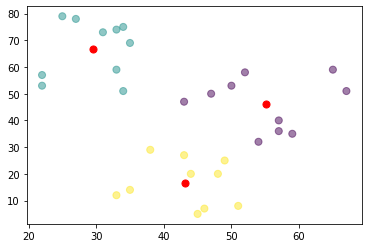

In [32]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[55.1        46.1       ]
 [30.83333333 74.66666667]
 [43.2        16.7       ]
 [27.75       55.        ]]


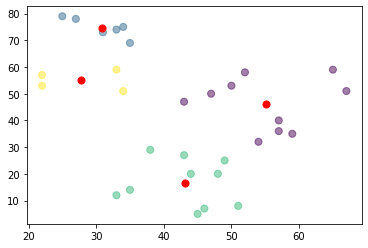

In [33]:
#Changing the number of clusters to 4
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

##### However an obvious problem occurs when we turn to our dataset because the data has 44 columns instead of two and so we cannot essentially plot the data and cluster means on a 2D graph, but we will try another method. First we will get on with our classifier.

In [34]:
#MiniBatchKMeans is used because it is much faster than the normal KMeans algorithm
kmeans = kmeans = MiniBatchKMeans(n_clusters=2,random_state=0).fit(X_train)
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 1], dtype=int32)

In [35]:
len(kmeans.labels_)

94743

##### What the above gives us is a marker for the cluster that each of the elements in X_train belongs to, here the data is divided into two clusters, therefore the cluster_ids are '0' and '1'.

In [36]:
#Predicting using the classifier that we have set up before using the two clusters
clusters_pred = kmeans.predict(X_test)
clusters_pred.shape

(10528,)

In [37]:
kmeans.cluster_centers_.shape

(2, 44)

##### What this gives us is the 44 dimensional centre of the two clusters, could be useful for getting the distance to a newly added point or could be useful for plotting if we find a way to plot it.

In [38]:
kmeans.score(X_train)
#Not sure how to interpret this yet

-429156274000300.8

##### **How to choose the right number of clusters to be used for KMeans which is different for different datasets(ELbow Curve)**

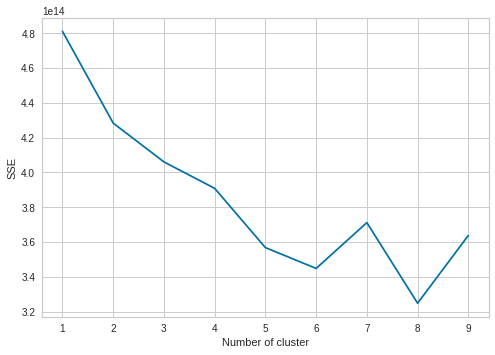

In [42]:
sse = {}
for k in range(1, 10):
    kmeans = MiniBatchKMeans(n_clusters=k, max_iter=1000).fit(X_train)
    #data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

##### So 3 seems to be the correct number of clusters to fit the Kmeans algorithm with, but to be sure we can try another method called the silhouette coefficient. For explanation on what the silhouette score and method is about look at the following link <br>
https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [46]:
#Takes quite a few minutes, please be patient
for n_cluster in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=n_cluster,random_state=0).fit(X_train)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_train, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.19427127096368757
For n_clusters=3, The Silhouette Coefficient is 0.1491764741981904
For n_clusters=4, The Silhouette Coefficient is 0.13792118139968804
For n_clusters=5, The Silhouette Coefficient is 0.13473040882028373
For n_clusters=6, The Silhouette Coefficient is 0.12136486453289022
For n_clusters=7, The Silhouette Coefficient is 0.11504514157491724
For n_clusters=8, The Silhouette Coefficient is 0.10777720738971484
For n_clusters=9, The Silhouette Coefficient is 0.10712944227750713
For n_clusters=10, The Silhouette Coefficient is 0.09117592319350323


##### The above suggests that 2 is the optimum number of clusters for this data, just to be sure we can use another measure.

In [50]:
#Takes much less time than above index
for n_cluster in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=n_cluster,random_state=0).fit(X_train)
    label = kmeans.labels_
    cal_coeff = calinski_harabasz_score(X_train, label)
    print("For n_clusters={}, The Calinski-Harabasz index is {}".format(n_cluster, cal_coeff))

For n_clusters=2, The Calinski-Harabasz index is 11647.43851423881
For n_clusters=3, The Calinski-Harabasz index is 8286.66119782203
For n_clusters=4, The Calinski-Harabasz index is 7069.147371229468
For n_clusters=5, The Calinski-Harabasz index is 6172.00915258825
For n_clusters=6, The Calinski-Harabasz index is 5361.963682670707
For n_clusters=7, The Calinski-Harabasz index is 4769.045377425232
For n_clusters=8, The Calinski-Harabasz index is 4250.1956335010955
For n_clusters=9, The Calinski-Harabasz index is 3979.764756628334
For n_clusters=10, The Calinski-Harabasz index is 3488.98879650136


##### This index too is conducive with the results of the Silhouette Coefficient and suggests that the number of clusters for this data should be two, we can try clustering a subsection of the columns and look at clustering for that data. For explanation and interpretation of the Calinski-Harabasz index look at the link given for Silhouette Coefficient.

##### **Some method of visualizing clusters**
https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.12-Three-Dimensional-Plotting.ipynb#scrollTo=4iTs8Bnk3PHo <br>
This would be an interesting link to look at for any kind of 3D plotting

Text(0.5, 0.92, 'Kmeans Classification output')

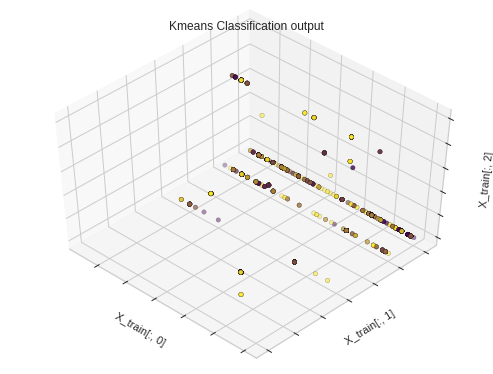

In [82]:
fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
kmeans = MiniBatchKMeans(n_clusters=2,random_state=0).fit(X_train)
labels = kmeans.labels_
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=labels.astype(np.float), cmap = 'viridis', edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('X_train[:, 0]')
ax.set_ylabel('X_train[:, 1]')
ax.set_zlabel('X_train[:, 2]')
ax.set_title('Kmeans Classification output')

##### We can also choose to colour by any other column, not just the labels outputted by kmeans

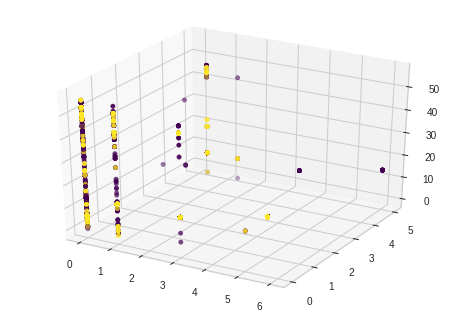

In [73]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
#We can change the columns we plot here
zdata = np.array(data_dt_final.iloc[:,0])
xdata = np.array(data_dt_final.iloc[:,1])
ydata = np.array(data_dt_final.iloc[:,2])
#We can change the column we colour by here
colour_col = np.array(data_dt_final.iloc[:,data_dt_final.columns.get_loc('TARGET')])
ax.scatter3D(xdata, ydata, zdata, c=colour_col, cmap='viridis');

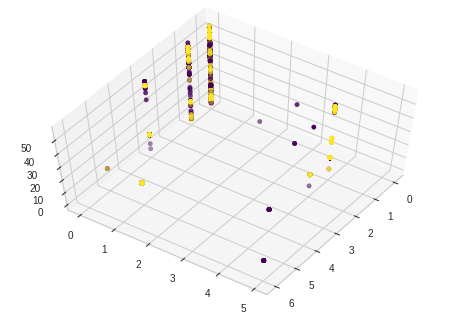

In [74]:
#Viewing from a different angle
ax.view_init(60, 35)
fig

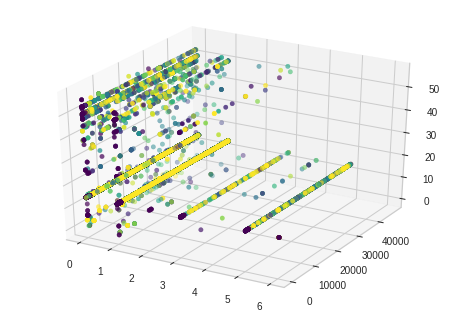

In [77]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
#We can change the columns we plot here
zdata = np.array(data_dt_final.iloc[:,0])
xdata = np.array(data_dt_final.iloc[:,1])
ydata = np.array(data_dt_final.iloc[:,12])
#We can change the column we colour by here
colour_col = np.array(data_dt_final.iloc[:,data_dt_final.columns.get_loc('AUTHORIZATION_CODE')])
ax.scatter3D(xdata, ydata, zdata, c=colour_col, cmap='viridis');

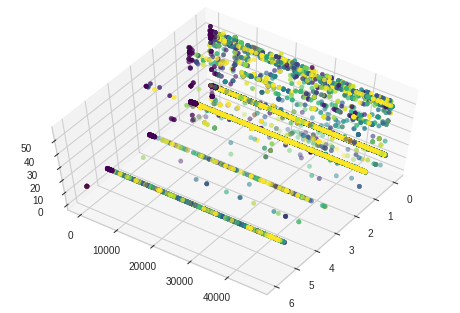

In [78]:
#Viewing from a different angle
ax.view_init(60, 35)
fig

##### **A second visualization technique(Somewhat like Mapper Plot)**
The following is on example data

In [89]:
np.array(sorted(symbol_dict.items())).T.shape

(2, 56)

In [92]:
np.vstack([q['close'] for q in quotes]).shape

(56, 1258)

Automatically created module for IPython interactive environment


Fetching quote history for 'AAPL'
Fetching quote history for 'AIG'
Fetching quote history for 'AMZN'
Fetching quote history for 'AXP'
Fetching quote history for 'BA'
Fetching quote history for 'BAC'
Fetching quote history for 'CAJ'
Fetching quote history for 'CAT'
Fetching quote history for 'CL'
Fetching quote history for 'CMCSA'
Fetching quote history for 'COP'
Fetching quote history for 'CSCO'
Fetching quote history for 'CVC'
Fetching quote history for 'CVS'
Fetching quote history for 'CVX'
Fetching quote history for 'DD'
Fetching quote history for 'DELL'
Fetching quote history for 'F'
Fetching quote history for 'GD'
Fetching quote history for 'GE'
Fetching quote history for 'GS'
Fetching quote history for 'GSK'
Fetching quote history for 'HD'
Fetching quote history for 'HMC'
Fetching quote history for 'HPQ'
Fetching quote history for 'IBM'
Fetching quote history for 'JPM'
Fetching quote history for 'K'
Fetching quote history for 'KMB'
Fetching quote history for 'KO'
Fetching quote h

Cluster 1: Apple, Amazon, Yahoo
Cluster 2: Comcast, Cablevision, Time Warner
Cluster 3: ConocoPhillips, Chevron, Total, Valero Energy, Exxon
Cluster 4: Cisco, Dell, HP, IBM, Microsoft, SAP, Texas Instruments
Cluster 5: Boeing, General Dynamics, Northrop Grumman, Raytheon
Cluster 6: AIG, American express, Bank of America, Caterpillar, CVS, DuPont de Nemours, Ford, General Electrics, Goldman Sachs, Home Depot, JPMorgan Chase, Marriott, 3M, Ryder, Wells Fargo, Wal-Mart
Cluster 7: McDonald's
Cluster 8: GlaxoSmithKline, Novartis, Pfizer, Sanofi-Aventis, Unilever
Cluster 9: Kellogg, Coca Cola, Pepsi
Cluster 10: Colgate-Palmolive, Kimberly-Clark, Procter Gamble
Cluster 11: Canon, Honda, Navistar, Sony, Toyota, Xerox


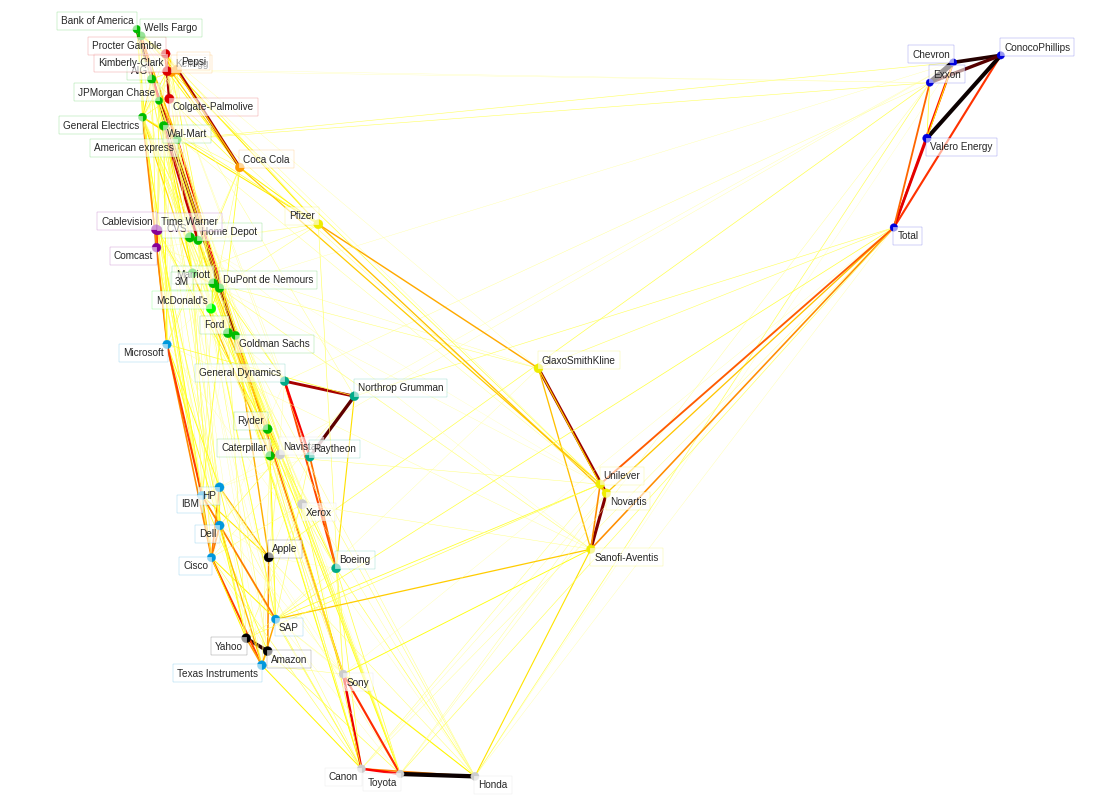

In [87]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import pandas as pd

from sklearn import cluster, covariance, manifold

print(__doc__)


# #############################################################################
# Retrieve the data from Internet

# The data is from 2003 - 2008. This is reasonably calm: (not too long ago so
# that we get high-tech firms, and before the 2008 crash). This kind of
# historical data can be obtained for from APIs like the quandl.com and
# alphavantage.co ones.

symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'McDonald\'s',
    'PEP': 'Pepsi',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas Instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}


symbols, names = np.array(sorted(symbol_dict.items())).T

quotes = []

for symbol in symbols:
    print('Fetching quote history for %r' % symbol, file=sys.stderr)
    url = ('https://raw.githubusercontent.com/scikit-learn/examples-data/'
           'master/financial-data/{}.csv')
    quotes.append(pd.read_csv(url.format(symbol)))

close_prices = np.vstack([q['close'] for q in quotes])
open_prices = np.vstack([q['open'] for q in quotes])

# The daily variations of the quotes are what carry most information
variation = close_prices - open_prices


# #############################################################################
# Learn a graphical structure from the correlations
edge_model = covariance.GraphicalLassoCV()

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

# #############################################################################
# Cluster using affinity propagation

_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

# #############################################################################
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

# #############################################################################
# Visualization
plt.figure(1, facecolor='w', figsize=(15, 11))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.nipy_spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()

##### **Now trying a similar graph as above on our data**


In [105]:
custom_symbol_dict = {}
for col in data_dt_final.keys():
  key = str(col)[:2] + "_" + str(col)[len(str(col))-2:]
  if key in custom_symbol_dict: 
    key = key + "_" + "2"
  custom_symbol_dict[key] = col
custom_symbol_dict

{'AC_DE': 'ACQUIRING_COUNTRY_CODE',
 'AU_DE': 'AUTHORIZATION_CODE',
 'BI_CY': 'BILLING_CURRENCY',
 'BI_NT': 'BILLING_AMOUNT',
 'CA_ID': 'CARD_ACCEPTOR_TERM_ID',
 'CA_ID_2': 'CARD_ACCEPTOR_ID',
 'CA_SS': 'CARD_ACC_NAME_ADDRESS',
 'CO_TE': 'CONVERSION_RATE_DATE',
 'C__00': 'C_100',
 'C__20': 'C_20',
 'C__40': 'C_40',
 'DE_ON': 'DECISION',
 'EC_FO': 'ECOM_INFO',
 'EX_TE': 'EXPIRY_DATE',
 'E__OR': 'E_COM_INDICATOR',
 'MC_CC': 'MCC',
 'PA_AN': 'PAN',
 'PD_10': 'PD10',
 'PD_11': 'PD11',
 'PD_12': 'PD12',
 'PD_D1': 'PD1',
 'PD_D2': 'PD2',
 'PD_D3': 'PD3',
 'PD_D4': 'PD4',
 'PD_D5': 'PD5',
 'PD_D6': 'PD6',
 'PD_D7': 'PD7',
 'PD_D8': 'PD8',
 'PD_D9': 'PD9',
 'PO_DE': 'POS_ENTRY_MODE',
 'PR_12': 'PROC_CODE_12',
 'PR_34': 'PROC_CODE_34',
 'PR_56': 'PROC_CODE_56',
 'RE_ME': 'RESPONSE_DATE_TIME',
 'SE_CY': 'SETTLEMENT_CURRENCY',
 'SE_DE': 'SERVICE_CODE',
 'SE_NT': 'SETTLEMENT_AMOUNT',
 'SE_TE': 'SETTLEMENT_DATE',
 'TA_ET': 'TARGET',
 'TR_CY': 'TRANSACTION_CURRENCY',
 'TR_ME': 'TRANSMISSION_DATE_TIM

In [106]:
len(custom_symbol_dict.keys())

44

In [108]:
symbols, names = np.array(sorted(custom_symbol_dict.items())).T
data_elem = np.vstack([data_dt_final[col] for col in data_dt_final.keys()])
variation = data_elem
variation.shape

(44, 105271)

In [110]:
import warnings
warnings.filterwarnings("ignore")

Cluster 1: C_100, C_20, C_40, PAN, PD1, PD2, PD5, PD9, TRANSMISSION_DATE_TIME
Cluster 2: AUTHORIZATION_CODE, BILLING_AMOUNT, DECISION, PD10, PD7, PD8, SETTLEMENT_AMOUNT, SETTLEMENT_DATE, TARGET, TRANSACTION_CURRENCY
Cluster 3: ECOM_INFO, EXPIRY_DATE, RESPONSE_DATE_TIME
Cluster 4: MCC, PD6
Cluster 5: CONVERSION_RATE_DATE, E_COM_INDICATOR, PD11, PD12, PROC_CODE_12, PROC_CODE_34, PROC_CODE_56
Cluster 6: ACQUIRING_COUNTRY_CODE, BILLING_CURRENCY, CARD_ACCEPTOR_TERM_ID, CARD_ACCEPTOR_ID, CARD_ACC_NAME_ADDRESS, PD3, PD4, POS_ENTRY_MODE, SETTLEMENT_CURRENCY, SERVICE_CODE, TRANSACTION_AMOUNT, TRANSACTION_LOCAL_DATE, VALID_FROM


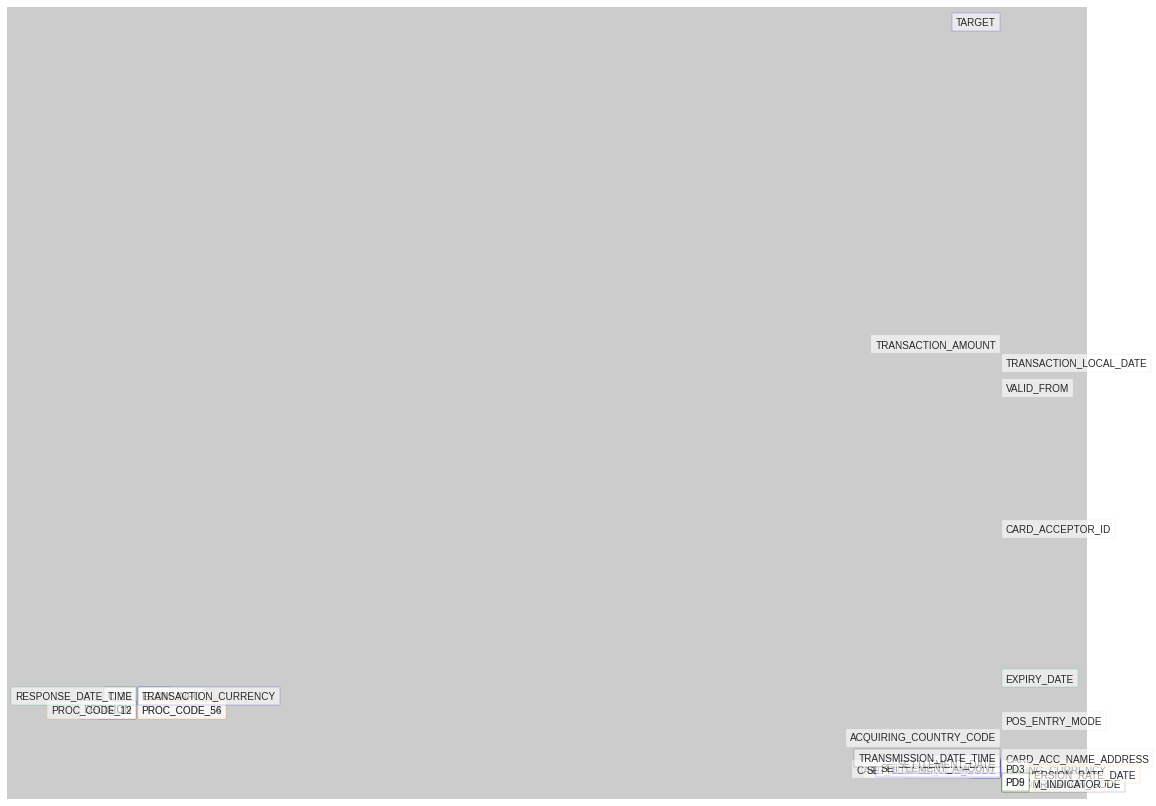

In [111]:
# #############################################################################
# Learn a graphical structure from the correlations
edge_model = covariance.GraphicalLassoCV()

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
#X /= X.std(axis=0)
edge_model.fit(X)

# #############################################################################
# Cluster using affinity propagation

_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

# #############################################################################
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

# #############################################################################
# Visualization
plt.figure(1, facecolor='w', figsize=(15, 11))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.nipy_spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()

##### This is another method, the details is not in detail here, but will try to find and share subsequently, this clustering could be more mathematically inclined based on the how the points are correlation on a higher dimensional space that forms a high dimensional manifold.

### **ROUGH WORK**

In [83]:
#https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html


In [ ]:
def create_graph(X, n_neighbors, include_self=False, verbose=0):
    kng = kneighbors_graph(X, n_neighbors, mode='distance', include_self=include_self)
    nb_graph = graph_shortest_path(kng, directed=False)
        
    if verbose:
        # Visualize nearest neighbor graph
        neigh = NearestNeighbors().fit(X)
        nbrs = neigh.kneighbors(n_neighbors=n_neighbors, return_distance=False)
        visualize_graph(X, nbrs)
    
    return nb_graph 

In [ ]:
create_graph(X_test,n_neighbors=2,verbose=1)

##### This can be deceptive like our one on decision trees, so we test it similarly

In [ ]:
y_prob = knn.predict_proba(X_test)
y_prob = y_prob[:,1]
y_prob
average_precision_score(y_test, y_prob)
#The time taken here is perceptibly more than an equal step in decision trees

In [ ]:
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(knn, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

##### Unlike Decision Tree, the Nearest Neighbour classifier works better, a lot better on this data as is seen from the graph, could be attributable to the considerably higher number of datapoints passed to this classifier as compared to Decision Trees.